In [0]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [0]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]

In [4]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


#**Data Cleaning**

In [5]:
numeric_cars = numeric_cars.replace('?',np.nan)
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:

numeric_cars = numeric_cars.astype('float')
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [7]:
numeric_cars = numeric_cars.dropna(subset=['price']) #removing the price, as it's what we try to predict
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [0]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [9]:
numeric_cars

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,109.1,188.8,68.9,55.5,2952.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,95.0,109.1,188.8,68.8,55.5,3049.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,95.0,109.1,188.8,68.9,55.5,3012.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,95.0,109.1,188.8,68.9,55.5,3217.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


In [10]:
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [11]:
numeric_cars.columns

Index(['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [0]:
ncols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg']

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for col in ncols:
  temp = numeric_cars[col]
  numeric_cars[col] = scaler.fit_transform(temp.values.reshape(-1,1))

In [14]:
numeric_cars

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.12500,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.18750,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.06250,0.313084,0.551020,0.138889,0.157895,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.157068,0.655977,0.711940,0.735043,0.641667,0.567882,0.885714,0.514286,0.15625,0.308411,0.510204,0.277778,0.315789,16845.0
201,0.157068,0.655977,0.711940,0.726496,0.641667,0.605508,0.885714,0.514286,0.10625,0.523364,0.469388,0.166667,0.236842,19045.0
202,0.157068,0.655977,0.711940,0.735043,0.641667,0.591156,0.742857,0.380952,0.11250,0.401869,0.551020,0.138889,0.184211,21485.0
203,0.157068,0.655977,0.711940,0.735043,0.641667,0.670675,0.335714,0.633333,1.00000,0.271028,0.265306,0.361111,0.289474,22470.0


#**ML Model**

In [0]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [0]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    last_train_row = int(3*len(rand_df) / 4)
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    k_values = [1,3,5,7,9]
    k_r2s = {}
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])
        predicted_labels = knn.predict(test_df[[train_col]])
        r2 = r2_score(test_df[target_col], predicted_labels)
        k_r2s[k] = r2
    return k_r2s

**Univariate model: finding the optimal value of K for all features**

In [17]:
k_r2_results = {}
train_cols = numeric_cars.columns.drop('price')
for col in train_cols:
    r2_val = knn_train_test(col, 'price', numeric_cars)
    k_r2_results[col] = r2_val
k_r2_results

{'bore': {1: -0.25193154719370536,
  3: 0.2820878651132932,
  5: 0.16725403829989827,
  7: 0.01891046753332626,
  9: -0.05166900634882432},
 'city-mpg': {1: 0.6239571515763283,
  3: 0.6774153575121489,
  5: 0.7357814886660897,
  7: 0.7243071678372913,
  9: 0.6679595563415366},
 'compression-rate': {1: 0.21613028082003882,
  3: 0.3626250506584269,
  5: 0.3114657362567881,
  7: 0.3754770799378082,
  9: 0.25011739811727673},
 'curb-weight': {1: 0.7040264319315944,
  3: 0.6649951718557083,
  5: 0.6879358348235697,
  7: 0.7182664258515352,
  9: 0.7028993428636495},
 'height': {1: -0.37009786420368496,
  3: 0.007290916600753539,
  5: 0.14128573354364282,
  7: 0.17067439598539091,
  9: 0.19291138695428056},
 'highway-mpg': {1: 0.5087147907395377,
  3: 0.6124198430498277,
  5: 0.6377016624229817,
  7: 0.7046170763110257,
  9: 0.6494915654045774},
 'horsepower': {1: 0.7550065449714205,
  3: 0.6280430395921622,
  5: 0.5529668516846733,
  7: 0.5697071970745922,
  9: 0.5690461534493114},
 'length'

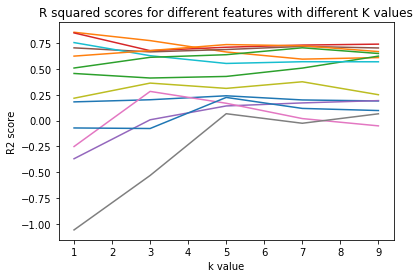

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_r2_results.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('R2 score')
    plt.title('R squared scores for different features with different K values')


As it can be seen from the graph, best values for K are on K=5 and K=7. The graphs are slightly higher for K=7, so we will use this value for our KNN classifier.

**Finding average R squared score for each feature to detect best features in the dataset.**

In [19]:
feature_avg_r2 = {}
for k,v in k_r2_results.items():
    avg_r2 = np.mean(list(v.values()))
    feature_avg_r2[k] = avg_r2
series_avg_r2 = pd.Series(feature_avg_r2)
series_avg_r2.sort_values(ascending=False)

width                0.741320
wheel-base           0.699572
curb-weight          0.695625
city-mpg             0.685884
highway-mpg          0.622589
horsepower           0.614954
length               0.485370
compression-rate     0.303163
normalized-losses    0.202178
peak-rpm             0.057769
bore                 0.032930
height               0.028413
stroke              -0.297390
dtype: float64

In [0]:
def knn_train_test_final(train_cols, target_col, df,k):
    np.random.seed(1)
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    last_train_row = int(3*len(rand_df) / 4)
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_df[train_cols], train_df[target_col])
    predicted_labels = knn.predict(test_df[train_cols])
    r2 = r2_score(test_df[target_col], predicted_labels)    
    return r2

In [23]:
k_r2_results_final = {}
best_features = ['width', 'wheel-base','curb-weight' , 'city-mpg' , 'highway-mpg','horsepower']
for i in range(1,6):
  r2_val = knn_train_test_final(best_features[:i], 'price', numeric_cars,7)
  k_r2_results_final[str(i+1) + " best features"] = r2_val

k_r2_results_final

{'2 best features': 0.7309524152702955,
 '3 best features': 0.7137806248410721,
 '4 best features': 0.8409252962852136,
 '5 best features': 0.8678531964019469,
 '6 best features': 0.8786190773672271}

It can be seen that our KNN regressor shows the best performance when we use the predict the car value with 7 nearest neighbors and use 6 best features. We were able to reach the R squared value of 0.8786, and therefore explains 87.86% of the total variation in the dataset.